In [1]:
import sys

sys.path.append("../src")

In [12]:
# from exp_smoothing import ExpSmoothing
import autoregressive
from importlib import reload
reload(autoregressive)

obj = autoregressive.ExpSmoothing()

In [3]:
repo = "p971074907"
country = "brl"
subregion1 = "rn"
path = country+':'+subregion1
feature = "date:newDeaths"
mavg_window_size = "7"
begin = "2020-01-01"
end = "2050-01-01"

data = obj.get_data(repo, path, feature, mavg_window_size, begin, end)

In [4]:
data_test_size_in_days = 7*10
input_window_size = 7
scores = obj.grid_search(data_test_size_in_days, input_window_size)

> Model[(7, 0, 0)] 1.610
done model arima
3 best models are: 
(7, 0, 0) 1.609520703254502



In [5]:
obj.retrain_best_models()

In [6]:
obj.instance_save()

{'instance_id': 'db6168fe-ee47-11ec-bdb6-811c38e77867',
 'cfg': '(7, 0, 0)',
 'score': 1.609520703254502,
 'region': 'brl:rn',
 'data_begin_date': '2020-03-13',
 'data_end_date': '2022-06-16',
 'date_of_training': '2022-06-17 11:14:53',
 'model_type': 'arima'}

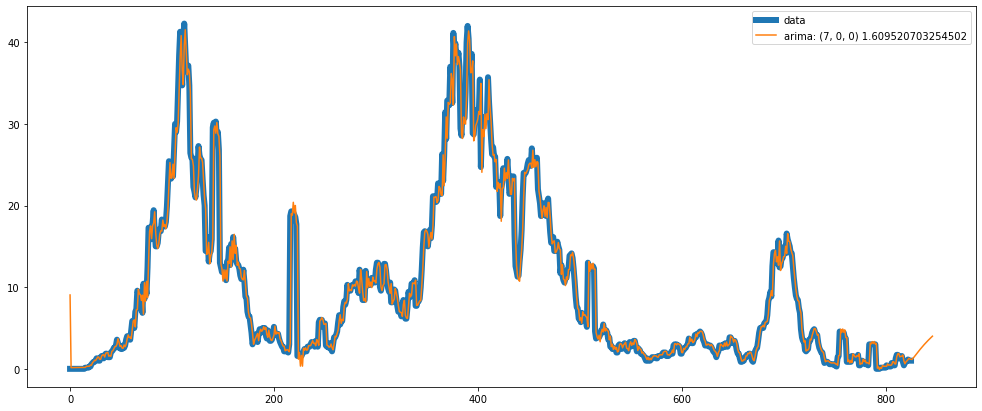

In [7]:
yhat = obj.instance_forecast_ahead(20)

import matplotlib.pyplot as plt
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

plt.figure(figsize=(17,7))
plt.plot(obj.data_used_in_trainning, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()

In [8]:
begin_forecast = "2020-04-01"
end_forecast = "2022-08-10"
yhat = obj.instance_forecast_by_period(str(obj.begin_raw.date()), end_forecast)

import matplotlib.pyplot as plt
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

plt.figure(figsize=(17,7))
plt.plot(obj.data_used_in_trainning, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()

UnboundLocalError: local variable 'instance_metadata' referenced before assignment

In [9]:
import uuid, json

# save_metadata_path = "../dbs/instances_metadata/"
filename = "metadata_[None, False, None, None, False, False]_brl:rn.json"
# metadata = json.load(open(save_metadata_path+filename))

instance_object = obj.load_instance_from_local_metadata_filename(filename)

begin_forecast = "2020-04-01"
end_forecast = "2022-08-10"
yhat = obj.instance_forecast_by_period(str(obj.begin_raw.date()), end_forecast, instance_object)

import matplotlib.pyplot as plt
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

plt.figure(figsize=(17,7))
plt.plot(obj.data_used_in_trainning, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()

# instance_forecast_by_period_from_object(metadata)

metadata_[None, False, None, None, False, False]_brl:rn.json


FileNotFoundError: [Errno 2] No such file or directory: '../dbs/instances_metadata/metadata_[None, False, None, None, False, False]_brl:rn.json.json'

In [84]:
model_inst = obj.model_instances[0][2]
print(obj.model_instances)

[('exp', <function exp_smoothing_forecast at 0x7f82160067a0>, <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper object at 0x7f820c906990>, '[None, False, None, None, False, False]', 1.648481941475326)]


In [85]:
save_instance_path = "../dbs/instances_object/"
save_metadata_path = "../dbs/instances_metadata/"

# metadata is a JSON object
def instance_forecast_by_period_from_object(metadata):
    # load local instance
    instance_object = load_instance(metadata['instance_id'])
    
    return instance_object

# load instance
def load_instance(instance_id):
    import pickle
    with open(save_instance_path+instance_id+".pkl", 'rb') as f:
        instance_object = pickle.load(f)
    return instance_object

In [86]:
metadata = json.load(open("../dbs/instances_metadata/metadata_[None, False, None, None, False, False]_brl:rn.json"))
print(instance_forecast_by_period_from_object(metadata))

In [3]:
import pandas as pd
begin = "2020-01-01"
end = "2020-01-10"
period = pd.date_range(begin, end)
print(period)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')


In [3]:
import json
  
# Opening JSON file
f = open('../dbs/metadata_to_train.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

print(data['begin'])

None


In [80]:
import json
from flask import jsonify

def predict_exp_smoothing(modelInstance):
    # get the metadata
    # metadata_instance = json.loads(request.form.get("metadata"))
    f = open('../dbs/instances_metadata/' + str(modelInstance) + '.json')
    metadata_instance = json.load(f)

    forecast_begin_date = metadata_instance['data_begin_date']
    forecast_end_date = metadata_instance['data_end_date']

    # instantiate handler object
    handler_exp = autoregressive.ExpSmoothing()
    
    # load instance object
    # instance_object = handler_exp.load_instance_from_local_metadata_filename(str(modelInstance))

    # get forecast from instance
    forecast = handler_exp.instance_forecast_by_period(forecast_begin_date, forecast_end_date, str(modelInstance))

    # format forecast to send back to requester
    response_json = handler_exp.predictions_to_weboutput(forecast, forecast_begin_date, forecast_end_date)

    return response_json

In [ ]:
# from exp_smoothing import ExpSmoothing
import autoregressive
from importlib import reload
reload(autoregressive)

obj = autoregressive.ExpSmoothing()

modelInstance = "ce9750c6-ed65-11ec-b8fc-397f49d71f23"

print(predict_exp_smoothing(modelInstance))

In [14]:
from datetime import datetime
str(datetime.now())

'2022-06-16 07:39:49.025020'

In [43]:
import json
# from exp_smoothing import ExpSmoothing
import autoregressive
from autoregressive import *
from importlib import reload
reload(autoregressive)
  
# Opening JSON file
f = open('../dbs/metadata_to_train.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

# get the metadata
metadata_to_train = data
print(metadata_to_train)

{'schema': 'schema', 'entity': 'entity', 'region': 'brl:rn', 'inputFeatures': 'deaths', 'outputFeatures': 'deaths', 'mavg_window_size': 7, 'begin': None, 'end': None, 'inputWindowSize': 7, 'outputWindowSize': 7, 'testSize': 28}


In [46]:
# instantiate handler object
handler_exp = autoregressive.ExpSmoothing()

# create list of configs
cfg_list = list()
# cfg_list.append(exp_smoothing_configs())
cfg_list.append(exp_smoothing_configs())

models = dict()
# models['exp'] = exp_smoothing_forecast
models['exp'] = exp_smoothing_forecast

In [47]:
# get adequate data to train
a = handler_exp.get_data(repo, path, feature, metadata_to_train['mavg_window_size'], begin, end)

In [48]:
# definindo fora e passando
handler_exp.grid_search(metadata_to_train['testSize'], metadata_to_train['inputWindowSize'], cfg_list, models)

[[[None, False, None, None, False, False]]]
{'exp': <function exp_smoothing_forecast at 0x7f903a1adc20>}
> Model[[None, False, None, None, False, False]] 0.552
done model exp
3 best models are: 
[None, False, None, None, False, False] 0.5519644218897356



[('[None, False, None, None, False, False]', 0.5519644218897356)]

In [26]:
# definindo internamente mas pegando do autoregressive_utils
handler_exp.grid_search(metadata_to_train['testSize'], metadata_to_train['inputWindowSize'], cfg_list, models)

[[[None, False, None, None, False, False]]]
{'exp': <function exp_smoothing_forecast at 0x7f903a1ab830>}
> Model[[None, False, None, None, False, False]] 0.552
done model exp
3 best models are: 
[None, False, None, None, False, False] 0.5519644218897356



[('[None, False, None, None, False, False]', 0.5519644218897356)]

In [ ]:
# retrain best models found by grid-search
handler_exp.retrain_best_models()

# persist best instances. send metadata to requester
# TODO: send binary to db
metadata_instance = handler_exp.instance_save()

In [53]:
# f"_builder_test_{configs_manner.type_used}"
import autoregressive

def example():
    print("SHOW")

string = "exp_smoothing_configs"
a = getattr(autoregressive, f"{string}")
print(a)

example
